# Plotting parametric geometry

In [1]:
!pwd

/home/hell/Desktop/PhD/PhD work/PINNs/10. June 2022/3. Week 3/Sunbird transfer/Modulus_my_examples/2D_heat_conduction/2. With SDF on interior node/1. 10k Iterations


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata # interpolation
from mpl_toolkits.mplot3d import Axes3D # for 3D if needed
from matplotlib import cm # colormap
from matplotlib import ticker # controls number of ticks in colorbar, helpful for very ugly unsymmetric colorbar

In [3]:
data = np.load('outputs/2D_heat_conduction/validators/validator.npz',allow_pickle=True)

In [4]:
key = list(data.keys())
key

['arr_0']

In [5]:
dictin = data[key[0]]
type(dictin), dictin

(numpy.ndarray,
 array({'x': array([[-0.5       ],
        [ 0.5       ],
        [ 0.5       ],
        ...,
        [-0.47867683],
        [-0.5       ],
        [ 0.38041285]], dtype=float32), 'y': array([[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.73182535],
        [0.7418504 ],
        [0.5140559 ]], dtype=float32), 'true_T': array([[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [0.94826055],
        [1.        ],
        [0.8064857 ]], dtype=float32), 'pred_T': array([[0.5501093 ],
        [0.58813417],
        [0.58813417],
        ...,
        [0.89217424],
        [0.93481356],
        [0.8008954 ]], dtype=float32)}, dtype=object))

In [6]:
# how to access this numpy array?
# there is a dictionary built inside the numpy array
# https://stackoverflow.com/a/37949466/14598633
data =  dictin[()]
keys = list(data.keys())

In [7]:
keys

['x', 'y', 'true_T', 'pred_T']

In [8]:
x_array, y_array, u_true, u_pred = data[keys[0]], data[keys[1]], data[keys[2]], data[keys[3]]#, data[keys[4]]

In [9]:
# # just an array to store x, y for griddata interpolation
# nodes_deepxde = np.hstack([x_array, y_array, z_array])

In [10]:
# nodes_deepxde

In [11]:
ub = [x_array.max(), y_array.max()]#, z_array.max()]
lb = [x_array.min(), y_array.min()]#, z_array.min()]
print(ub)
print(lb)
#n_points = 300
# Intepolation points
#x = np.linspace(lb[0], ub[0], n_points)
#y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
#X, Y = np.meshgrid(x,y)

n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

[0.5, 1.0]
[-0.5, 0.0]


In [12]:
# # a function to search for index
# def return_indices(lower_limit_k, upper_limit_k, k):
#     # returns indices for k (conductivity) between lower_limit_k and upper_limit_k
#     indices = []
#     for index,item in enumerate(k):
#         if upper_limit_k>=item>=lower_limit_k:
#             indices.append(index)
#     # move out of the function to see the plot 
#     #print(np.shape(indices))
#     #plt.plot(k[indices])
#     return indices

In [13]:
# np.unique(k_array)

/tmp/ipykernel_438139/3210637820.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_under('k')
/tmp/ipykernel_438139/3210637820.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_over('k')


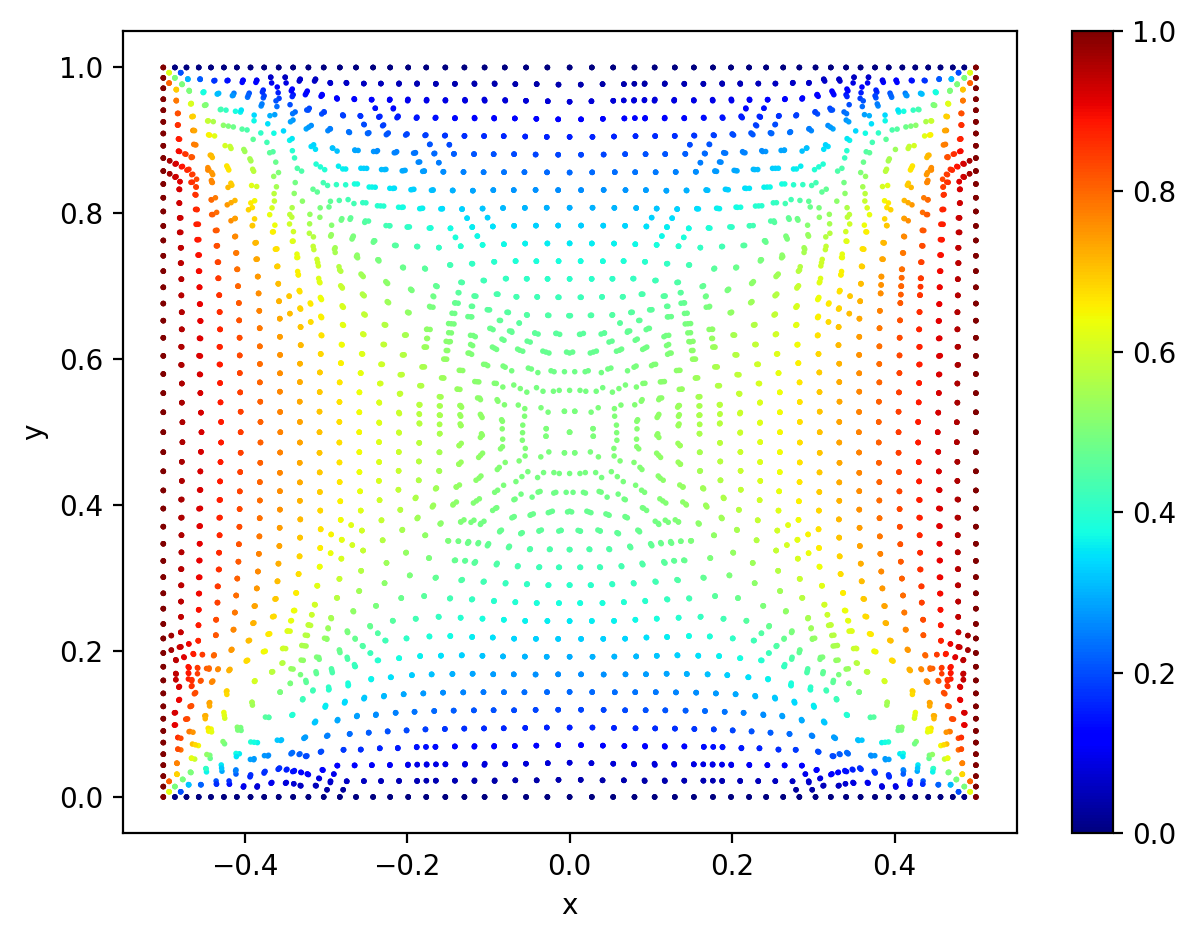

In [14]:
# trying to plot 1 plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)#, projection='3d')
sc = ax.scatter(x_array, y_array, c = u_true, s = 1, cmap=cm.jet)#, vmin=0, vmax=1)
#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
plt.colorbar(sc)
sc.cmap.set_under('k')
sc.cmap.set_over('k')
plt.xlabel('x')
plt.ylabel('y')
#ax.set_ylim([0, 1.0])
#ax.set_zlabel('z')
plt.tight_layout()
#plt.title('Temperature distribution')
#plt.savefig('plots/Iteration_'+str(max_iter)+'_Best_PINN_predicted.jpg', dpi = 200)

/tmp/ipykernel_438139/4286612487.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_under('k')
/tmp/ipykernel_438139/4286612487.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_over('k')


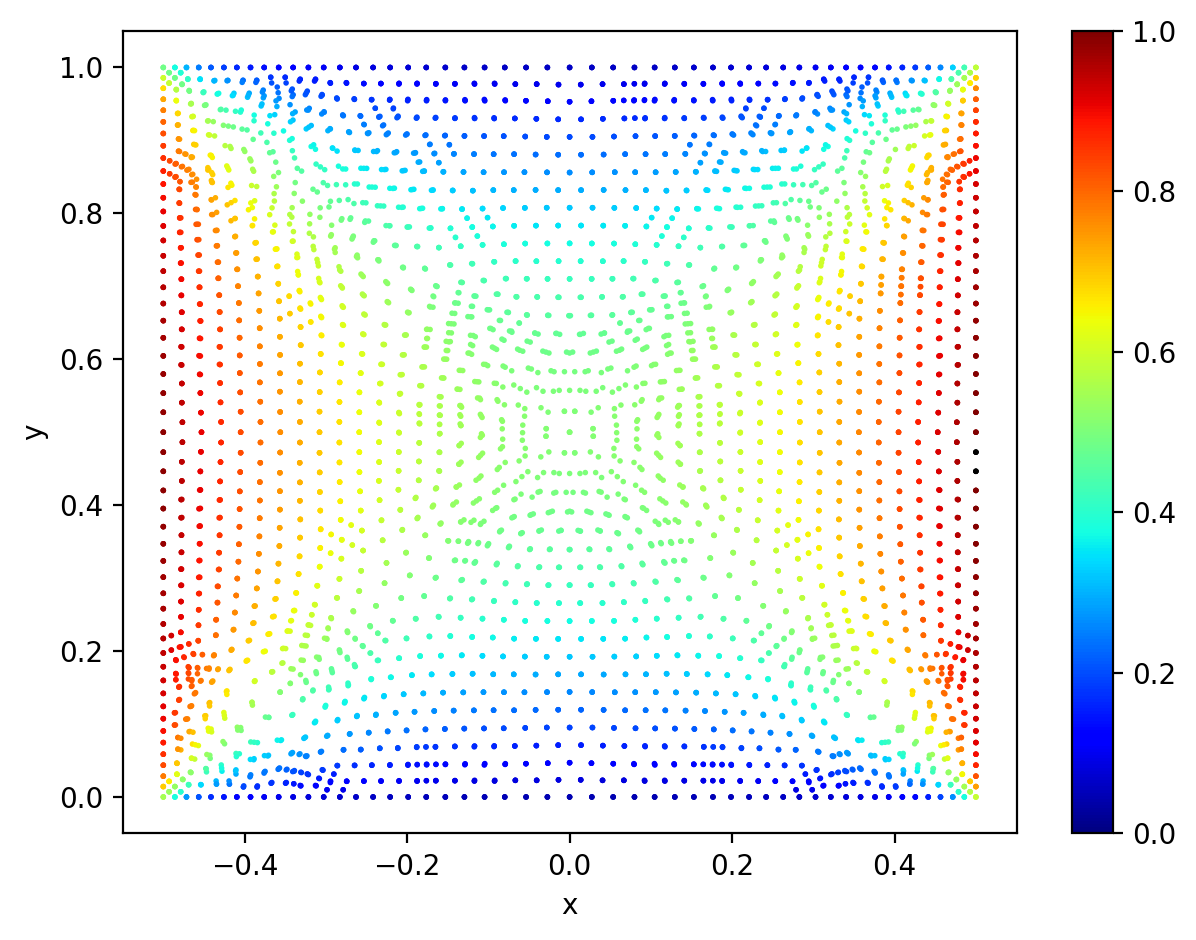

In [15]:
# trying to plot 1 plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)#, projection='3d')
sc = ax.scatter(x_array, y_array, c = u_pred, s = 1, cmap=cm.jet, vmin=0, vmax=1)
#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
plt.colorbar(sc)
sc.cmap.set_under('k')
sc.cmap.set_over('k')
plt.xlabel('x')
plt.ylabel('y')
#ax.set_ylim([0, 1.0])
#ax.set_zlabel('z')
plt.tight_layout()
#plt.title('Temperature distribution')
#plt.savefig('plots/Iteration_'+str(max_iter)+'_Best_PINN_predicted.jpg', dpi = 200)

/tmp/ipykernel_438139/2393206277.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_under('k')
/tmp/ipykernel_438139/2393206277.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_over('k')


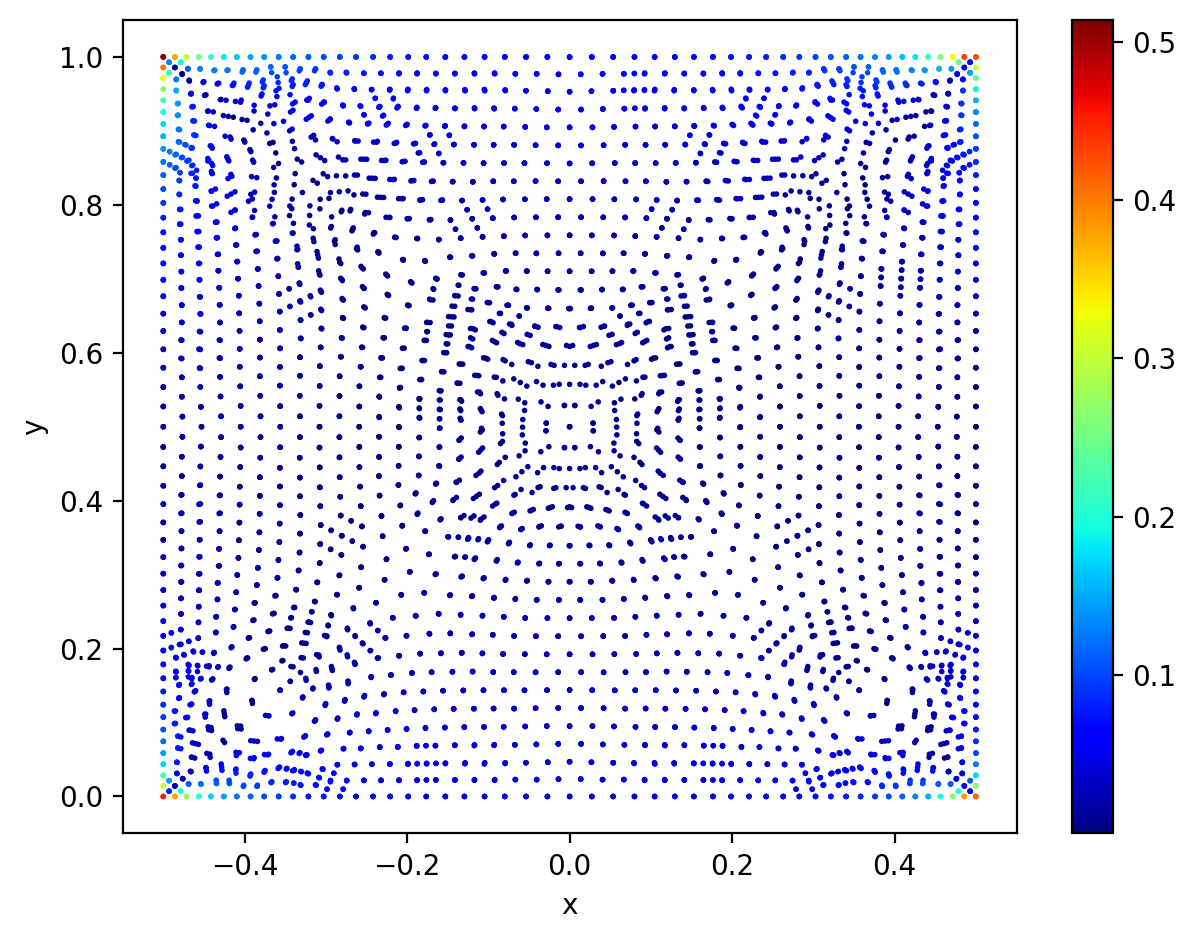

In [16]:
# trying to plot 1 plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)#, projection='3d')
sc = ax.scatter(x_array, y_array, c = abs(u_true-u_pred), s = 1, cmap=cm.jet)#, vmin=0, vmax=1)
#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
plt.colorbar(sc)
sc.cmap.set_under('k')
sc.cmap.set_over('k')
plt.xlabel('x')
plt.ylabel('y')
#ax.set_ylim([0, 1.0])
#ax.set_zlabel('z')
plt.tight_layout()
#plt.title('Temperature distribution')
#plt.savefig('plots/Iteration_'+str(max_iter)+'_Best_PINN_predicted.jpg', dpi = 200)

In [17]:
# # a function to search for index
# def return_indices(lower_limit_k, upper_limit_k, k):
#     # returns indices for k (conductivity) between lower_limit_k and upper_limit_k
#     indices = []
#     for index,item in enumerate(k):
#         if upper_limit_k>=item>=lower_limit_k:
#             indices.append(index)
#     # move out of the function to see the plot 
#     #print(np.shape(indices))
#     #plt.plot(k[indices])
#     return indices

/tmp/ipykernel_438139/265260289.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_under('k')
/tmp/ipykernel_438139/265260289.py:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_over('k')


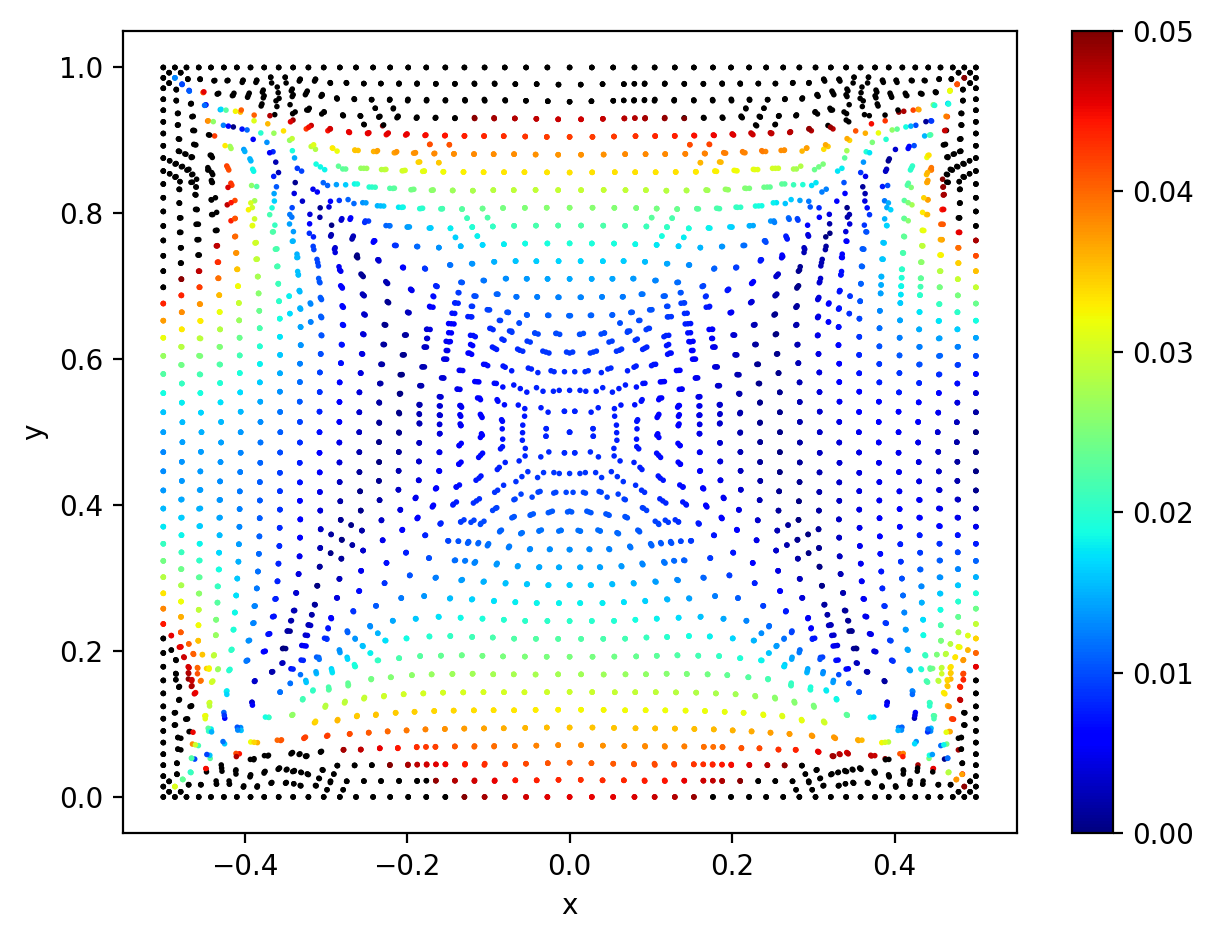

In [18]:
#indices = return_indices(0.0, 0.1, abs(u_true-u_pred))

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)#, projection='3d')
sc = ax.scatter(x_array, y_array, c = abs(u_true-u_pred), s = 1, cmap=cm.jet, vmin=0, vmax=0.05)
#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
plt.colorbar(sc)
sc.cmap.set_under('k')
sc.cmap.set_over('k')
plt.xlabel('x')
plt.ylabel('y')
#ax.set_ylim([0, 1.0])
#ax.set_zlabel('z')
plt.tight_layout()
#plt.title('Temperature distribution')
#plt.savefig('plots/Iteration_'+str(max_iter)+'_Best_PINN_predicted.jpg', dpi = 200)

In [19]:
rel_l2_norm_of_error = np.linalg.norm(u_true-u_pred,2)/np.linalg.norm(u_true,2)
rel_l2_norm_of_error

0.10124006

In [20]:
nodes = np.hstack([x_array, y_array])

In [21]:
n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

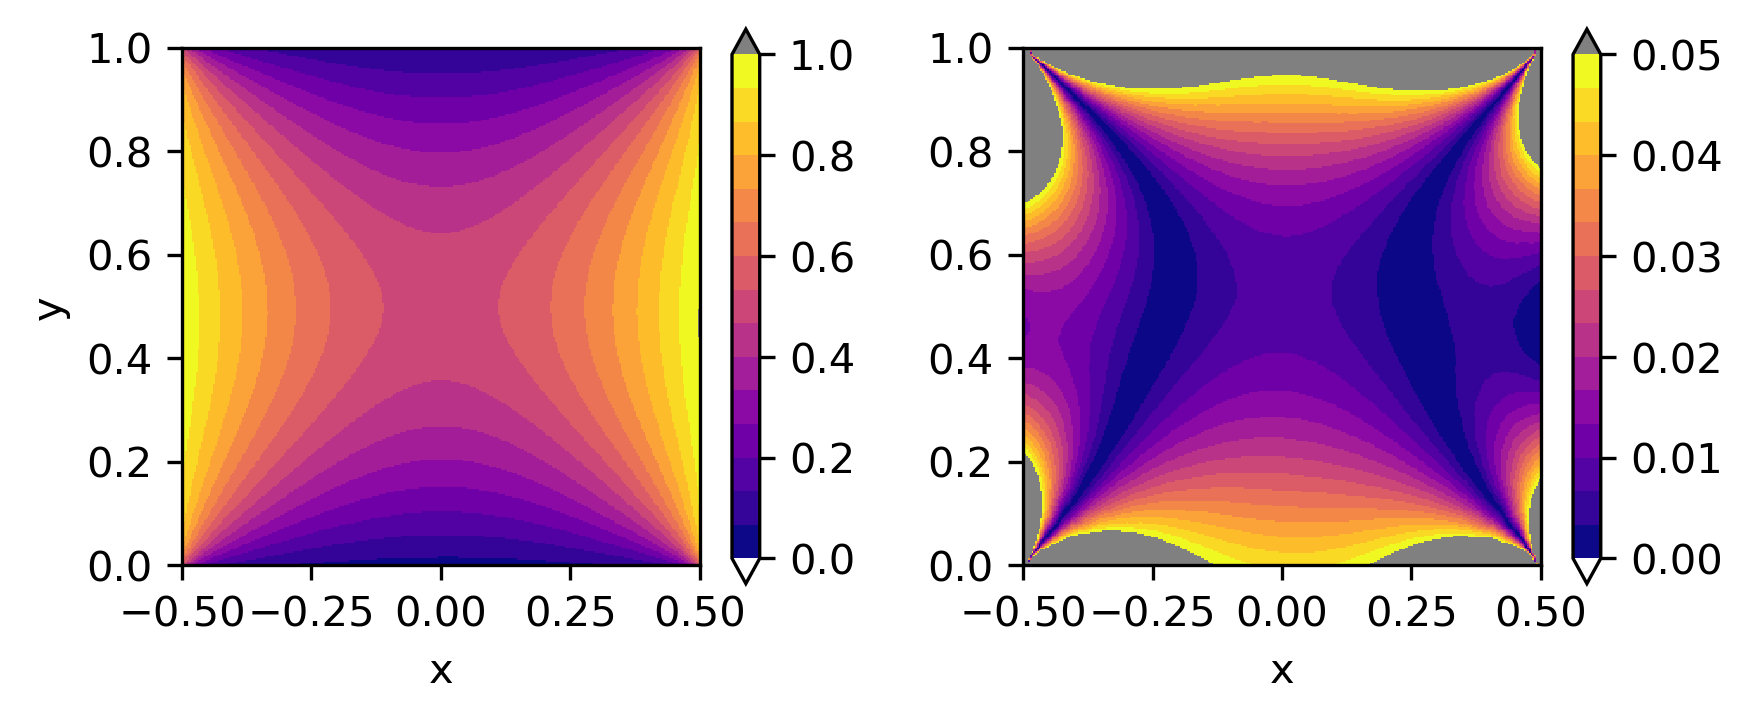

In [23]:
fig, ax = plt.subplots(1, 2,dpi=300)
#ax = fig.add_subplot(111)#, projection='3d')
# deepxde result
data_deepxde = griddata(nodes, u_pred.flatten(), (X, Y), method='linear')
sc1 = ax[0].imshow(data_deepxde, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)

n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

# absolute pointwise difference
data_difference = griddata(nodes, u_true.flatten(), (X, Y), method='linear')
sc2 = ax[1].imshow(abs(data_difference-data_deepxde), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)

sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')


#sc = ax.scatter(nodes[:,0], nodes[:,1], c = temperature,s=3, cmap=cm.jet)
#plt.colorbar(sc)
ax[0].set(xlabel='x', ylabel='y')
ax[1].set(xlabel='x', ylabel='')

#ax[0].set_title('(a)')#,fontsize=8)
#ax[1].set_title('(b)')#,fontsize=8)

#fig.tight_layout()
# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

#fig.colorbar(sc1, ax=ax.ravel().tolist(),shrink=0.5)
fig.colorbar(sc1, ax=ax[0],shrink=0.5,extend='both')
fig.colorbar(sc2, ax=ax[1],shrink=0.5,extend='both')
#fig.supxlabel('(b) Model 4',y=0.15)

#fig.tight_layout()
#ax.set_zlabel('z')
#plt.title('Temperature distribution')
plt.savefig('plots/solutions.jpg', dpi = 500,bbox_inches='tight',transparent=True)
# https://stackoverflow.com/a/63076575/14598633